# Estimación del beta de una acción


- Mide como es que un activo se mueve en relación al mercado
- Si tengo un portafoliop y le añado un activo, en realidad es más importante saber como se mueve este activo en relación a mi portafolio existente que su volatilidad misma


Pensando en terminos de regresión, ¿puedo utilizar el rendimiento del mercado para predecir un activo individual?

$$r_i = \alpha_i +  \beta_i r_{market}$$

Notese que $\beta$ también puede ser: 

$$\beta_i = \frac{cov(i, market)}{var(market)}$$


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/en/f/f3/SML-chart.png" width="400px" height="400px" />


# Caso ejemplo Beta: Google y la bolsa de valores

In [1]:
# Bajamos los ETF de yahoo
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

tickers = ['VTI', 'VGT']
start_date = '2015-01-01'
end_date = "2022-01-01"


St = yf.download(tickers, start=start_date)['Adj Close']
St.head()
rt = St.pct_change().dropna()


[*********************100%%**********************]  2 of 2 completed


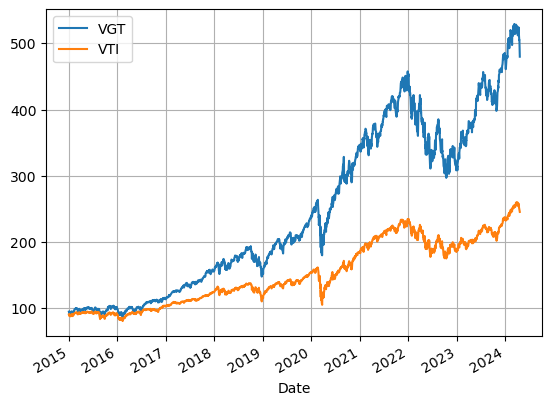

In [2]:
# Grafique google y el mercado de estados unidos
St[['VGT', 'VTI']].plot()
plt.grid()

# Normalizar precios

Dividimos los precios entre el precio inicial 

In [3]:
# Crea un data frame que tiene precios normalizados
St['normalized_VGT'] = St['VGT'] / St['VGT'].iloc[0]
St['normalized_VTI'] = St['VTI'] / St['VTI'].iloc[0]

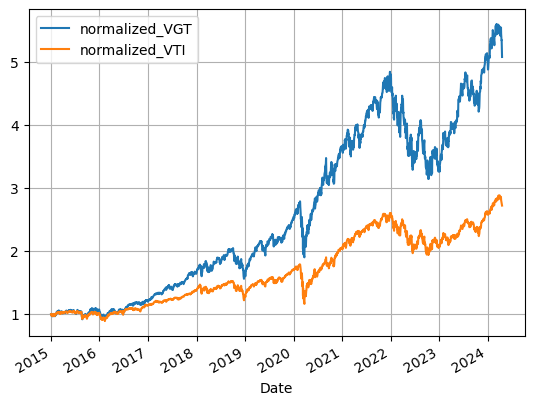

In [4]:
# Visualización de precios normalizados
St[['normalized_VGT', 'normalized_VTI']].plot()
plt.grid()

In [5]:
# Gráfico que compara rendimientos 


# Calculemos $\beta$ de google y el mercado 

$$r_i = \alpha_i +  \beta_i r_{market}$$


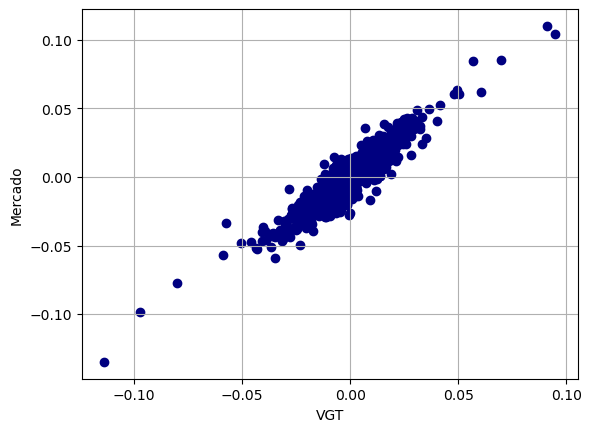

In [6]:
plt.scatter(rt.VTI, rt.VGT, c = 'navy')
plt.xlabel('VGT')
plt.ylabel('Mercado')
plt.grid()

In [7]:
# Grafique el modelo

In [8]:
# Calcular beta con regresión
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = rt[['VTI']]
y = rt[['VGT']]

model.fit(X, y)
model.coef_[0][0]

1.195390656541632

$$VGT = 1.19 * mercado$$

$$\beta_i = \frac{Cov(google, market)}{Var(market)} $$

In [9]:
# Calcular beta con covarianza y varianza
rt.cov()['VGT']['VTI'] / rt.VTI.var()

1.1953906565416328

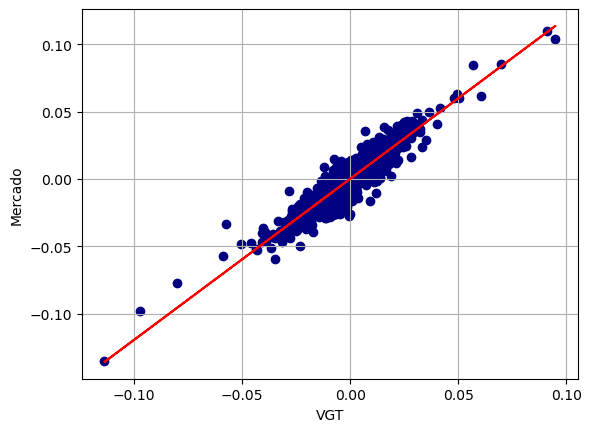

In [10]:
rt['predictions'] = model.predict(X)

plt.scatter(rt.VTI, rt.VGT, c = 'navy')
plt.plot(rt.VTI, rt.predictions, c = 'red')
plt.xlabel('VGT')
plt.ylabel('Mercado')
plt.grid()

# Calcula el R2 de nuestro modelo

In [11]:
# Prediga y ponga el promedio
error_modelo = np.var(rt.VGT - rt.predictions)
error_promedio = np.var(rt.VGT - rt.VGT.mean())

In [12]:
# Defina las varianzas
(error_promedio - error_modelo) / error_promedio

0.8623147678724529

In [13]:
# Calcule el R2
from sklearn.metrics import r2_score
r2_score(y_pred = rt.predictions, y_true = rt.VGT)

0.8623147678724528

# Vamos a descargar algunos activos del mercado estadounidense y calcular la beta de cada activo

In [14]:
# Descargar precios y graficar
tickers = ['VTI', 'GOOGL', 'EFX', 'COST', 'WMT', 'PG',
     'DIS', 'IBM', 'AMZN', 'TGT', 'JPM', 'INTC',
    'MSFT', 'BLK', 'NFLX']

St = yf.download(tickers, start=start_date)['Adj Close']
St.head()
rt = St.pct_change().dropna()

[*********************100%%**********************]  15 of 15 completed


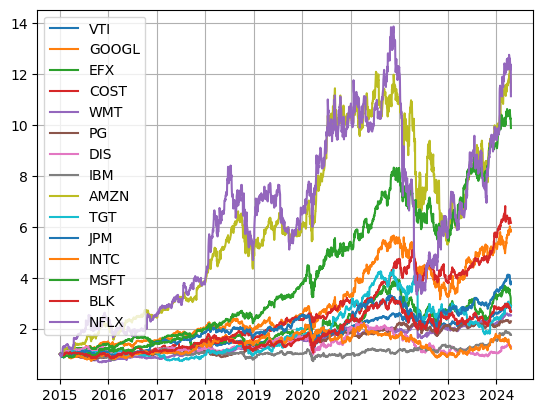

In [15]:
# Normalizamos todos los activos 
for i in tickers:
    St['normalized_' + i] = St[i] / St[i].iloc[0]
    plt.plot(St['normalized_' + i], label = i)

plt.legend()
plt.grid()

In [16]:
# Calculemos beta, rendimiento y R2 de cada acción 
r2s = []
betas = []
rendimiento = []

for i in tickers:
    X = rt[['VTI']]
    y = rt[[i]]
    # Beta
    model = LinearRegression().fit(X, y)
    beta = model.coef_[0][0]
    betas.append(beta)
    # R2
    predictions = model.predict(X)
    r2 = r2_score(y_true = y, y_pred = predictions)
    r2s.append(r2)
    # rend
    rend = np.mean(rt[[i]])[0] * 252
    rendimiento.append(rend)

C:\Users\luism\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\luism\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\luism\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\luism\anaconda3\Lib\si

In [17]:
df = pd.DataFrame()
df['tickers'] = tickers
df['betas'] = betas
df['r2'] = r2s
df['rendimientos'] = rendimiento

In [18]:
df

,tickers,betas,r2,rendimientos
0,VTI,1.000000,1.000000,0.124756
1,GOOGL,1.117574,0.515217,0.230274
2,EFX,0.987702,0.378858,0.158767
3,COST,0.701843,0.346345,0.219748
4,WMT,0.494448,0.181231,0.122073
5,PG,0.543937,0.283964,0.106624
6,DIS,1.001268,0.424516,0.067057
7,IBM,0.829009,0.401392,0.089474
8,AMZN,1.116152,0.381529,0.315855
9,TGT,0.805932,0.221937,0.163889


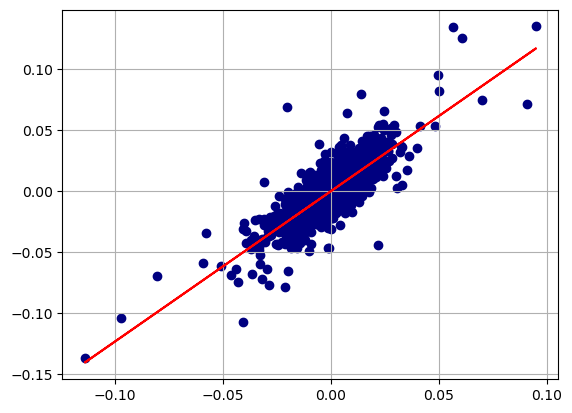

In [19]:
X = rt[['VTI']]
y = rt[['BLK']]
model = LinearRegression().fit(X,y)
predictions = model.predict(X)

plt.scatter(rt.VTI, rt.BLK, c = 'navy')
plt.plot(rt.VTI, predictions, c = 'red')

plt.grid()

0.13662763378042397


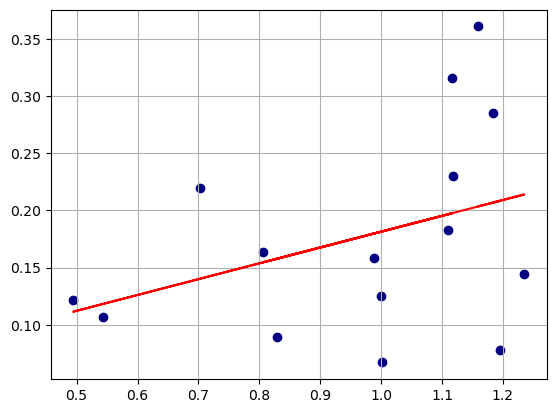

In [20]:
X = df[['betas']]
y = df[['rendimientos']]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)

plt.scatter(X, y, c = 'navy')
plt.plot(X, predictions, c = 'red')

plt.grid()

print(r2_score(y_pred = predictions, y_true=y))

0.23617635079721422


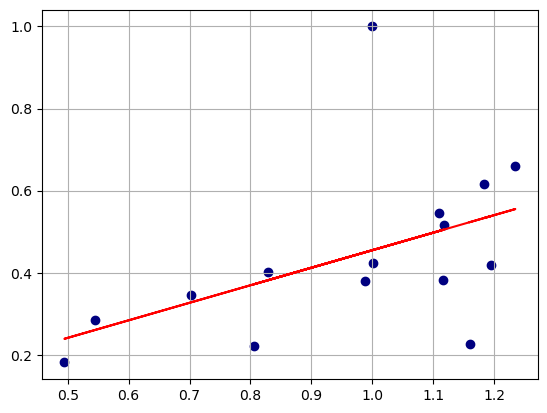

In [21]:
X = df[['betas']]
y = df[['r2']]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)

plt.scatter(X, y, c = 'navy')
plt.plot(X, predictions, c = 'red')

plt.grid()
print(r2_score(y_pred = predictions, y_true=y))

In [22]:
#  Poner todo en un data frame 
df = pd.DataFrame()
df['stock'] = betas.keys()
df['betas'] = [betas[i][0] for i in betas]
df['rendimientos'] = [betas[i][1] for i in betas]
df['r2'] = [betas[i][2] for i in betas]

# Regresion beta vs rendimientos
model = LinearRegression().fit(df[['betas']], df[['rendimientos']])
df['predictions_beta_rendimiento'] = model.predict(df[['betas']])

# Regrsion beta vs r2
model = LinearRegression().fit(df[['betas']], df[['r2']])
df['predictions_beta_r2'] = model.predict(df[['betas']])


AttributeError: 'list' object has no attribute 'keys'

In [ ]:
# Grafico, beta vs rendimiento
for i in range(len(df)):
    flag_df = df.iloc[i]
    plt.scatter(flag_df['betas'], flag_df['rendimientos'])
    plt.text(flag_df['betas'], flag_df['rendimientos'], flag_df['stock'])
plt.plot(df['betas'], df['predictions_beta_rendimiento'])
plt.grid(True)
plt.xlabel("Beta")
plt.ylabel("Rendimientos")

In [ ]:
# Grafico, beta vs R2 
for i in range(len(df)):
    flag_df = df.iloc[i]
    plt.scatter(flag_df['betas'], flag_df['r2'])
    plt.text(flag_df['betas'], flag_df['r2'], flag_df['stock'])
plt.plot(df['betas'], df['predictions_beta_r2'])
plt.grid(True)
plt.xlabel("Beta")
plt.ylabel("Rendimientos")